<a href="https://colab.research.google.com/github/suleymanacikgoz/Global_AI_Hub_Project/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK MARKET ANALYSİS**

**yfinance is a Python library that enables users to fetch financial data from Yahoo Finance. It's widely used for financial analysis, algorithmic trading, and research purposes due to its ease of use and comprehensive data retrieval capabilities.**

Content:



1.   Import Libraries
2.   Load and Check Data
1.   Variable Description
2.   Univarite Variable Analysis
1.   Data Visualization and Feature Engineering








# **Import Libraries 📜**

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

#Yahoo'dan verileri çekmek için kullanılacak kütüphane
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()


from datetime import datetime


# **Load and Check Data**

In [20]:

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-06,186.279999,188.750000,184.800003,188.699997,188.699997,34725300,AMAZON
2024-05-07,188.919998,189.940002,187.309998,188.759995,188.759995,34048900,AMAZON
2024-05-08,187.440002,188.429993,186.389999,188.000000,188.000000,26136400,AMAZON
2024-05-09,188.880005,191.699997,187.440002,189.500000,189.500000,43368400,AMAZON
2024-05-10,189.160004,189.889999,186.929993,187.479996,187.479996,34141800,AMAZON
2024-05-13,188.000000,188.309998,185.360001,186.570007,186.570007,24898600,AMAZON
2024-05-14,183.820007,187.720001,183.449997,187.070007,187.070007,38698200,AMAZON
2024-05-15,185.970001,186.720001,182.729996,185.990005,185.990005,75459900,AMAZON
2024-05-16,185.600006,187.309998,183.460007,183.630005,183.630005,38834500,AMAZON


In [31]:
#Yüklenen veriyi incelerken kullanacağımız bazı fonksiyonlar

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

def grab_col_names(dataframe, cat_th=13, car_th=20):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [22]:
# Veriye genel bakış
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-18,173.000000,175.240005,172.580002,175.050003,174.125275,65496700,APPLE
2023-05-19,176.389999,176.389999,174.940002,175.160004,174.234680,55772400,APPLE
2023-05-22,173.979996,174.710007,173.449997,174.199997,173.279755,43570900,APPLE
2023-05-23,173.130005,173.380005,171.279999,171.559998,170.653702,50747300,APPLE
2023-05-24,171.089996,172.419998,170.520004,171.839996,170.932220,45143500,APPLE


In [32]:
check_df(AAPL)
#Eksik değer olmadığını bu fonksiyon ile tespit edebiliriz.

##################### Shape #####################
(252, 7)
##################### Types #####################
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object
##################### Head #####################
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-18  173.000000  175.240005  172.580002  175.050003  174.125275   
2023-05-19  176.389999  176.389999  174.940002  175.160004  174.234680   
2023-05-22  173.979996  174.710007  173.449997  174.199997  173.279755   
2023-05-23  173.130005  173.380005  171.279999  171.559998  170.653702   
2023-05-24  171.089996  172.419998  170.520004  171.839996  170.932220   

              Volume company_name  
Date                               
2023-05-18  65496700        APPLE  
2023-05-19  55772400        APPLE

In [23]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,181.785199,183.260437,180.411151,181.875238,181.292345,5.849316e+07
std,8.501454,8.322691,8.483019,8.446440,8.370934,1.866140e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,174.319996,176.367500,173.307503,174.880001,174.119312,4.695375e+07
50%,181.965004,183.104996,180.235001,181.865005,181.373085,5.368500e+07
75%,189.415001,190.132507,188.047501,189.437496,188.820126,6.543352e+07
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.632241e+08


# Variable Description



*   *Date*: Hisse senedinin açılış
*   *Open*: The opening price of the stock on that day.

*   *High*: The highest price of the stock during the trading day.
*   *Low*: The lowest price of the stock during the trading day.

*   *Close*: The closing price of the stock on that day.
*   *Volume*: The number of shares traded on that day.

*    *Adj Close* : The adjusted closing price, which accounts for corporate actions like dividends and stock splits.














In [24]:
for company in company_list:
  print(company.describe())

             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   181.785199  183.260437  180.411151  181.875238  181.292345   
std      8.501454    8.322691    8.483019    8.446440    8.370934   
min    165.350006  166.399994  164.080002  165.000000  164.776505   
25%    174.319996  176.367500  173.307503  174.880001  174.119312   
50%    181.965004  183.104996  180.235001  181.865005  181.373085   
75%    189.415001  190.132507  188.047501  189.437496  188.820126   
max    198.020004  199.619995  197.000000  198.110001  197.589523   

             Volume  
count  2.520000e+02  
mean   5.849316e+07  
std    1.866140e+07  
min    2.404830e+07  
25%    4.695375e+07  
50%    5.368500e+07  
75%    6.543352e+07  
max    1.632241e+08  
             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   138.559607  140.053754  137.347151 

In [26]:
cat_cols, num_cols, cat_but_car=grab_col_names(df)

Observations: 1008
Variables: 7
cat_cols: 1
num_cols: 6
cat_but_car: 0
num_but_cat: 0


[]

# **DATA VISUALIZATION**

In [33]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=[f"{tech} için Kapanış Fiyatı" for tech in tech_list])

for i, company in enumerate(company_list, 1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    trace = go.Scatter(x=company.index, y=company['Adj Close'], mode='lines', name=f"{tech_list[i - 1]}")
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=1000, width=1200,
    title="Kapanış Fiyatının Tarihsel Görünümü",
    showlegend=True,
    xaxis=dict(title="Tarih"),
    yaxis=dict(title="Kapanış Fiyatı"),
    title_font=dict(size=24),
)


fig.show()


In [ ]:
#Hacim, bir varlığın veya menkul kıymetin belirli bir süre boyunca, çoğunlukla da bir gün içinde el değiştiren miktarıdır.


fig = make_subplots(rows=2, cols=2, subplot_titles=[f"{tech} için Günlük İşlem Hacmi" for tech in tech_list])


for i, (company, tech) in enumerate(zip(company_list, tech_list), 1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    trace = go.Scatter(x=company.index, y=company['Volume'], mode='lines', name=f"{tech}")
    fig.add_trace(trace, row=row, col=col)


fig.update_layout(
    height=800, width=1000,
    title="Hisse Senetlerinin Günlük İşlem Hacmi",
    showlegend=True,
    xaxis=dict(title="Tarih"),
    yaxis=dict(title="Hacim"),
    title_font=dict(size=20),
)


fig.show()


In [ ]:
# Hareketli ortalama (MA), sürekli güncellenen bir ortalama fiyat oluşturarak fiyat verilerini düzelten basit bir teknik analiz aracıdır.
#Ortalama, 10 gün, 30 dakika, 60 hafta veya yatırımcının seçtiği herhangi bir zaman dilimi gibi belirli bir süre boyunca alınır.

# MA hesaplamaları
ma_day = [10, 30, 60]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Subplot oluşturma
fig = make_subplots(rows=2, cols=2, subplot_titles=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'))

# AAPL için grafik
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Adj Close'], mode='lines', name='AAPL için Kapanış'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=1, col=1)

# GOOG için grafik
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Adj Close'], mode='lines', name='GOOG için Kapanış'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=1, col=2)

# MSFT için grafik
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Adj Close'], mode='lines', name='MSFT için Kapanış'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=2, col=1)

# AMZN için grafik
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Adj Close'], mode='lines', name='AMZN için Kapanış'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=2, col=2)

# Layout ayarları
fig.update_layout(height=1000, width=1600, title_text="Hisse Senedi Fiyatları ve Hareketli Ortalamalar")
fig.show()


In [ ]:
#Bu kısımda ayrıca Feature Engineering de gerçekleştirmiş olduk.

In [67]:
#Bu kısımda hisselerin günlük getirilerine göz atacağız.

# Günlük getiri oranlarının hesaplanması
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Subplot oluşturma
fig = make_subplots(rows=2, cols=2, subplot_titles=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'))

# AAPL için grafik
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Daily Return'], mode='lines+markers', name='AAPL Günlük Getiri'), row=1, col=1)

# GOOG için grafik
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Daily Return'], mode='lines+markers', name='GOOG Günlük Getiri'), row=1, col=2)

# MSFT için grafik
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Daily Return'], mode='lines+markers', name='MSFT Günlük Getiri'), row=2, col=1)

# AMZN için grafik
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Daily Return'], mode='lines+markers', name='AMZN Günlük Getiri'), row=2, col=2)

# Layout ayarları
fig.update_layout(height=1000, width=1600, title_text="Hisselerin Günlük Getirisi")
fig.show()


In [68]:
#Getiri oranlarına bir de histogram ile göz atalım.


# Günlük getiri oranlarının hesaplanması
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Subplot oluşturma
fig = make_subplots(rows=2, cols=2, subplot_titles=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'))

# AAPL için histogram
fig.add_trace(go.Histogram(x=AAPL['Daily Return'], nbinsx=50, name='AAPL Günlük Getiri'), row=1, col=1)

# GOOG için histogram
fig.add_trace(go.Histogram(x=GOOG['Daily Return'], nbinsx=50, name='GOOG Günlük Getiri'), row=1, col=2)

# MSFT için histogram
fig.add_trace(go.Histogram(x=MSFT['Daily Return'], nbinsx=50, name='MSFT Günlük Getiri'), row=2, col=1)

# AMZN için histogram
fig.add_trace(go.Histogram(x=AMZN['Daily Return'], nbinsx=50, name='AMZN Günlük Getiri'), row=2, col=2)

# Layout ayarları
fig.update_layout(height=800, width=1200, title_text="Hisselerin Günlük Getirisi")
fig.show()


# **KORELASYON ANALİZİ**

In [64]:
# Hisselerin kapanış değerlerini bir dataframe içerisinde saklıyoruz.
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']


tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-18,NaN,NaN,NaN,NaN
2023-05-19,0.000628,-0.016081,-0.002186,-0.000565
2023-05-22,-0.005481,-0.010667,0.021258,0.008921
2023-05-23,-0.015155,-0.000174,-0.020497,-0.018432
2023-05-24,0.001632,0.015306,-0.013383,-0.004472


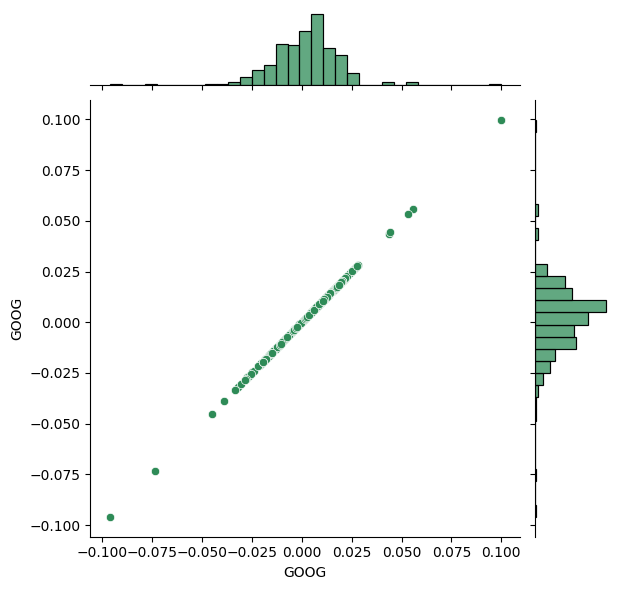

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

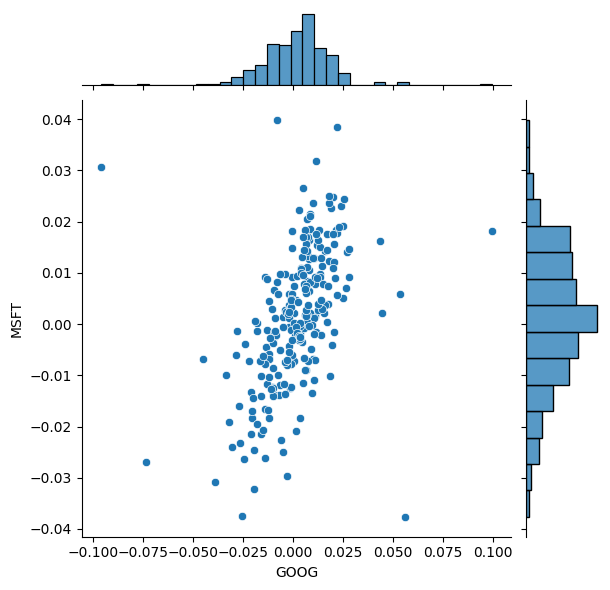

In [ ]:
# Google ve Microsoft'un günlük getirilerini karşılaştırmak için joinplot'u kullanacağız
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


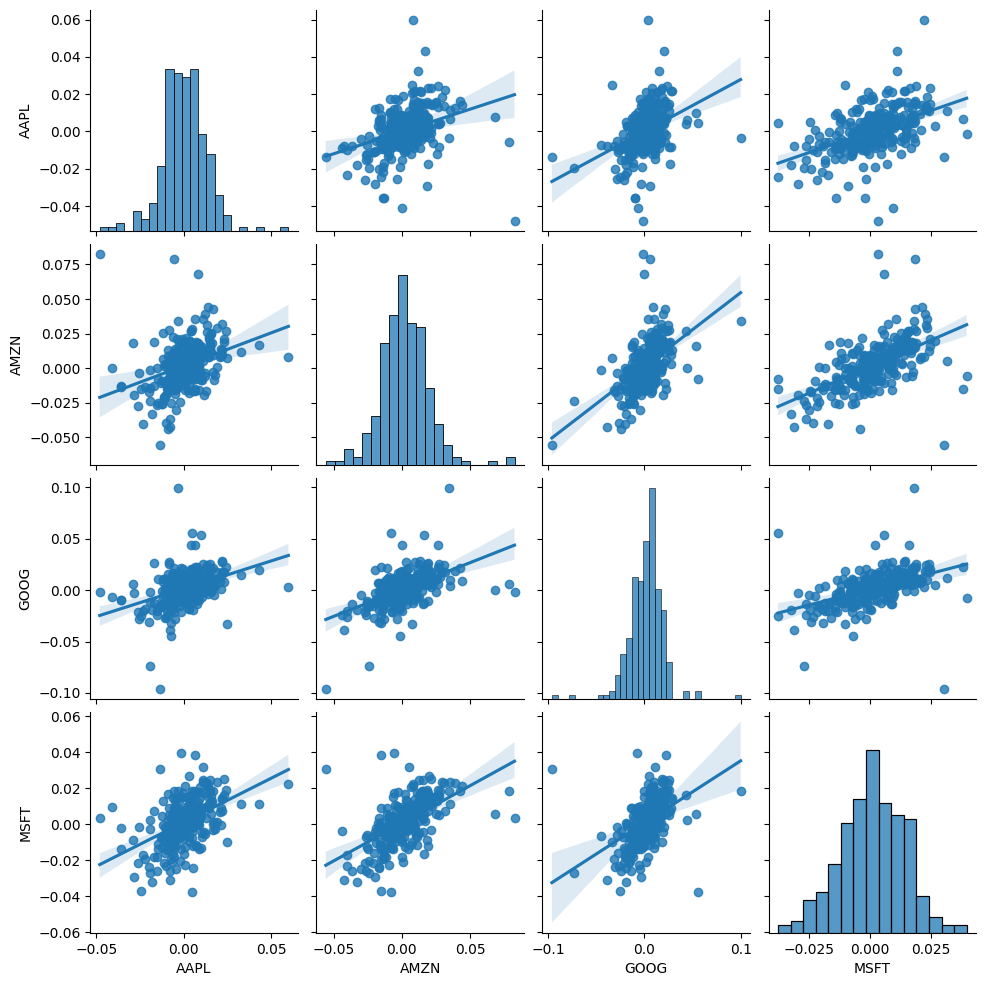

In [ ]:
#Bütün hisselerin birbirleriyle ilişkilerini bu kod ile grafiğe dökebiliriz.
sns.pairplot(tech_rets, kind='reg')

In [ ]:
# Üstteki grafiklere bakarak hisseler arası uyumun varlığı hakkında yorumlar yapabiliriz.
# Örneğin Amazon ve Apple arasında pozitif bir kolerasyon olduğundan bahsedebiliriz.

Text(0.5, 1.0, 'Kapanış fiyatı korelasyonu')

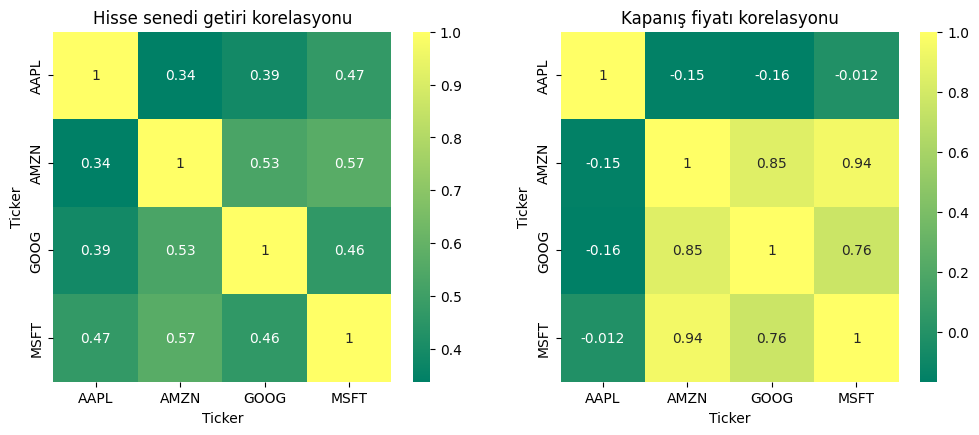

In [65]:
# Son olarak, hisse senetlerinin günlük getiri değerleri arasındaki korelasyonun gerçek sayısal değerlerini elde etmek için bir korelasyon grafiği de yapabiliriz.
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Hisse senedi getiri korelasyonu')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Kapanış fiyatı korelasyonu')

In [ ]:
#Bir önceki grafiklerde de gördüğümüz gibi hem Amazon Google uyumundan hem de Amazon Microsoft uyumundan bahsedebiliriz.